In [7]:
import sys, os
import importlib
from importlib import reload

import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy
import tqdm
import joblib

import ROOT

In [18]:
data_dir = "/home/tomren/geant_projects/musim_test"
fname_bkg = f"{data_dir}/cosmic_all/run_1_digi.root"
fname_sig = f"{data_dir}/llp_hxx_bb/run_25_digi_cosmic_recon_skim.root"

## Open Background file
fbkg = ROOT.TFile(fname_bkg)
tree_bkg = fbkg.Get("data")
entries = tree_bkg.GetEntries()
branches = [b.GetName() for b in tree_bkg.GetListOfBranches()]
print("Entries", entries)
print("Branches", branches)

## Open Signal file
fsig = ROOT.TFile(fname_sig)
tree_sig = fsig.Get("data")
entries = tree_sig.GetEntries()
branches = [b.GetName() for b in tree_sig.GetListOfBranches()]
print("Entries", entries)
print("Branches", branches)

Entries 218543
Branches ['Digi_x', 'Digi_y', 'Digi_z', 'Digi_t', 'Digi_edep', 'Digi_trackID', 'Digi_pdgID', 'Digi_detectorID', 'Digi_type', 'Digi_hitInds', 'Digi_direction']
Entries 9172
Branches ['SimEntry', 'Track_x0', 'Track_y0', 'Track_z0', 'Track_t0', 'Track_kx', 'Track_ky', 'Track_kz', 'Track_kt', 'Track_cov', 'Track_chi2', 'Track_id', 'Track_iv_ind', 'Track_iv_err', 'Track_digiInds', 'Vertex_x0', 'Vertex_y0', 'Vertex_z0', 'Vertex_t0', 'Vertex_cov', 'Vertex_chi2', 'Vertex_id', 'Vertex_trackInds', 'Vertex_tracklet_n0', 'Vertex_tracklet_n2', 'Vertex_tracklet_n3', 'Vertex_tracklet_n4p', 'Digi_x', 'Digi_y', 'Digi_z', 'Digi_t', 'Digi_edep', 'Digi_trackID', 'Digi_pdgID', 'Digi_detectorID', 'Digi_type', 'Digi_hitInds', 'Digi_direction', 'Run_number', 'Evt_number', 'Seed_0', 'Seed_1', 'Gen_x', 'Gen_y', 'Gen_z', 'Gen_t', 'Gen_px', 'Gen_py', 'Gen_pz', 'Gen_pdgID', 'Gen_index', 'Vertex_selected_ind']


In [19]:
nhits_bkg = []
for i in range(tree_bkg.GetEntries()):
    tree_bkg.GetEntry(i)
    nhits_bkg.append(len(tree_bkg.Digi_x))

nhits_sig = []
for i in range(tree_sig.GetEntries()):
    tree_sig.GetEntry(i)
    nhits_sig.append(len(tree_sig.Digi_x))    

Text(0.5, 0, '#hits per event')

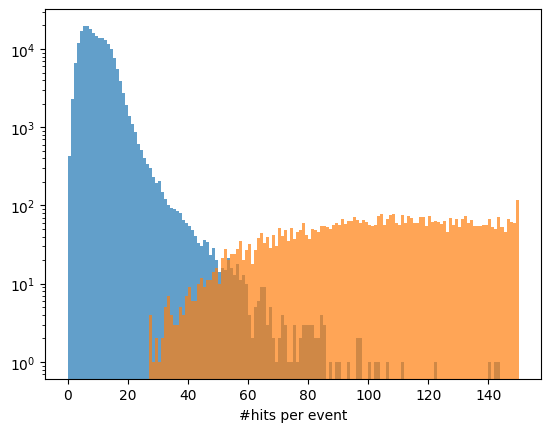

In [26]:
plt.hist(nhits_bkg, bins=150, range=(0,150), alpha=0.7);
plt.hist(nhits_sig, bins=150, range=(0,150), alpha=0.7);
plt.yscale("log")
plt.xlabel("#hits per event")